<a href="https://colab.research.google.com/github/lyeslehara1996/Colab/blob/Dev/deepleaarning_Formation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#imporatation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


from sklearn.preprocessing  import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 



In [23]:
df=pd.read_csv('/content/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data=df[['#Passengers']].values


In [6]:
#preparation de la base de donnee 

sc=MinMaxScaler(feature_range=(0,1))
data_scaled=sc.fit_transform(data)
data_scaled

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [24]:
#input output databases
X_data=[]
Y_data=[]
look_back=1 #observer un mois si on vx observer plus on met sa valeur
for i in range(len(data_scaled)-1):
  X_data.append(data_scaled[i:(i+look_back),0])
  Y_data.append(data_scaled[i+look_back,0])
X_data,Y_data=np.array(X_data),np.array(Y_data)
print(X_data)
print(Y_data)


[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]
 [0.1042471 ]
 [0.05598456]
 [0.01930502]
 [0.06949807]
 [0.07915058]
 [0.08880309]
 [0.14285714]
 [0.11389961]
 [0.13127413]
 [0.14285714]
 [0.18339768]
 [0.18339768]
 [0.15444015]
 [0.11196911]
 [0.08108108]
 [0.11969112]
 [0.12934363]
 [0.14671815]
 [0.17181467]
 [0.14864865]
 [0.15250965]
 [0.22007722]
 [0.24324324]
 [0.26640927]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374517]
 [0.17760618]
 [0.17760618]
 [0.25482625]
 [0.25289575]
 [0.24131274]
 [0.26833977]
 [0.30888031]
 [0.32432432]
 [0.25675676]
 [0.20656371]
 [0.14671815]
 [0.18725869]
 [0.19305019]
 [0.16216216]
 [0.25289575]
 [0.23745174]
 [0.25096525]
 [0.30888031]
 [0.38223938]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.19111969]
 [0.24

In [25]:
#rechaping pour le passer en RNN on dois transformer en 3 dimmension 
X_data=np.reshape(X_data,(X_data.shape[0],X_data.shape[1],1))

In [26]:
X_data.shape

(143, 1, 1)

In [38]:
#separartion de donnee de test et donnee entrainemeent 

train_size=int(len(X_data)*0.7)
test_size=len(X_data)-train_size
x_train=X_data[0:train_size,:]
x_test=X_data[train_size:len(X_data),:]
y_train=Y_data[0:train_size]
y_test=Y_data[train_size:len(Y_data)]


In [39]:
x_train.shape

(100, 1, 1)

In [40]:
y_train.shape


(100,)

In [42]:
pad_train = pad_sequences(x_train)
T = pad_train.shape[1]
print('The length of training sequence is: ', T)

# padding the test sequence
pad_test = pad_sequences(x_test, maxlen=T)
print('The length of testing sequence is: ', pad_test.shape[1])


The length of training sequence is:  1
The length of testing sequence is:  1


In [47]:
#construction de RNN
model=Sequential()
model.add(LSTM(units=10, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=10, return_sequences=True))
model.add(LSTM(units=10))

#ajouter la couche de sortie
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='mean_squared_error')

model.summary()




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 1, 10)             480       
_________________________________________________________________
lstm_10 (LSTM)               (None, 1, 10)             840       
_________________________________________________________________
lstm_11 (LSTM)               (None, 10)                840       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 2,171
Trainable params: 2,171
Non-trainable params: 0
_________________________________________________________________


In [52]:
#application de model 

model.fit(x_train,y_train, epochs=500,batch_size=32)


Epoch 1/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0216
Epoch 2/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0216
Epoch 3/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0215
Epoch 4/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0214
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0214
Epoch 6/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0213
Epoch 7/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0212
Epoch 8/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0212
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0211
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0210
Epoch 11/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0210
Epoch 12/500
4/4 [==============================] - 0s 5ms/step - loss: 0.0209
Epoch 13/500
4/4 [==============================] - 0s 5ms/st

In [53]:
y_pred=model.predict(x_test)


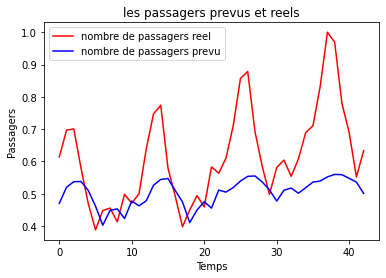

In [54]:
plt.plot(y_test, color='red',label='nombre de passagers reel')
plt.plot(y_pred, color='blue',label='nombre de passagers prevu')
plt.title('les passagers prevus et reels')
plt.xlabel('Temps')
plt.ylabel('Passagers')
plt.legend()
plt.show()